# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [173]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [174]:
athletes = pd.read_csv("athletes.csv")

In [175]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [176]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [177]:
df=athletes

In [178]:
df.shape

(11538, 11)

Questão 5

In [179]:
bra=df[df['nationality'] == 'BRA']
usa=df[df['nationality'] == 'USA']
can=df[df['nationality'] == 'CAN']

In [180]:
usa['height'].mean()

1.7877678571428557

In [181]:
bra['height'].mean()

1.764033613445379

Questão 6

In [182]:
can['height'].mean()

1.7585937500000004

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [183]:
#função para pegar uma amostra de tamanho 3000 da coluna 'height'
height_sample=get_sample(df,'height',n=3000)

In [184]:
#teste de normalidade Shapiro-Wilk
shapiro=sct.shapiro(height_sample)
shapiro

(0.9961519837379456, 5.681722541339695e-07)

In [185]:
#Resporta questão 1
def q1():
    return shapiro[1]>0.05

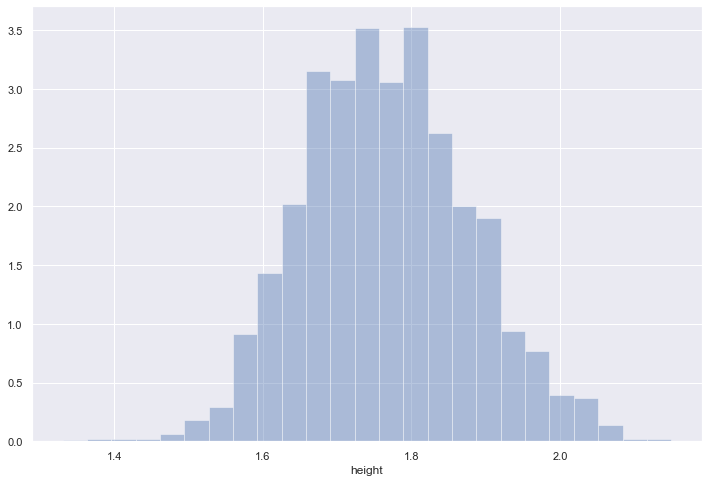

In [186]:
#Historgrama da amostra da coluna 'height'
sns.distplot(height_sample, kde=False, bins=25, hist_kws={"density": True})

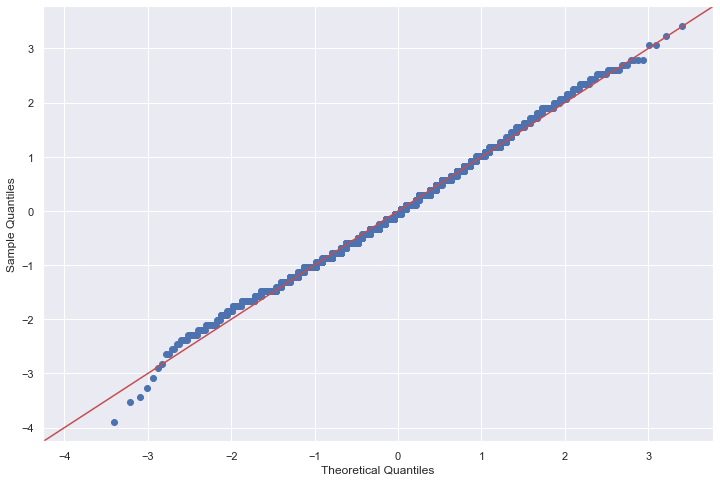

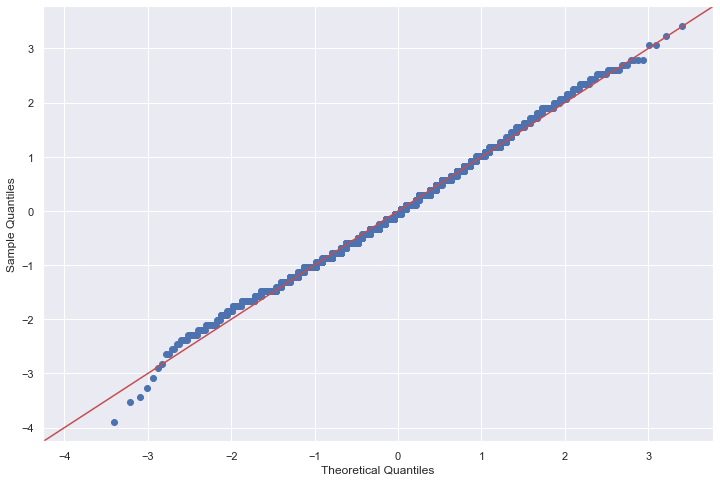

In [187]:
#Q-Q plot
sm.qqplot(height_sample, fit=True, line="45")

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

Resposta: Pelo formato da curva não, pois ela tem as caracteristicas visuais de uma curva normal e, no teste Shapiro-Wilk, o resultado do p valor foi menor que o nível de significância (rejeitar a hipotese nula).

* Plote o qq-plot para essa variável e a analise.

Resposta: Pelo qq-plot, os dados da amostra possui uma distribuição normal (pontos alinhados em uma reta x=y)

* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

Resposta: Teria que ser menor que o valor calculado do p valor 0,00005

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [188]:
#teste de normalidade Jarque-Bera
jqb=sct.jarque_bera(height_sample)
jqb

(13.03363513594265, 0.001478366424594868)

In [189]:
def q2():
    return jqb[1]>0.05

__Para refletir__:

* Esse resultado faz sentido?

Resposta: Ainda não faz muito sentido, pois o p valor calculado está menor que a significancia porém está maior que no teste Shapiro-Wilk

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [190]:
#Obtendo amostra de tamanho 3000 da coluna 'weight'
weight_sample=get_sample(df,'weight',n=3000)

In [191]:
#teste de normalidade D'Agostino-Pearson
dp=sct.normaltest(weight_sample)
dp

NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111)

In [192]:
def q3():
    return dp[1]>0.05

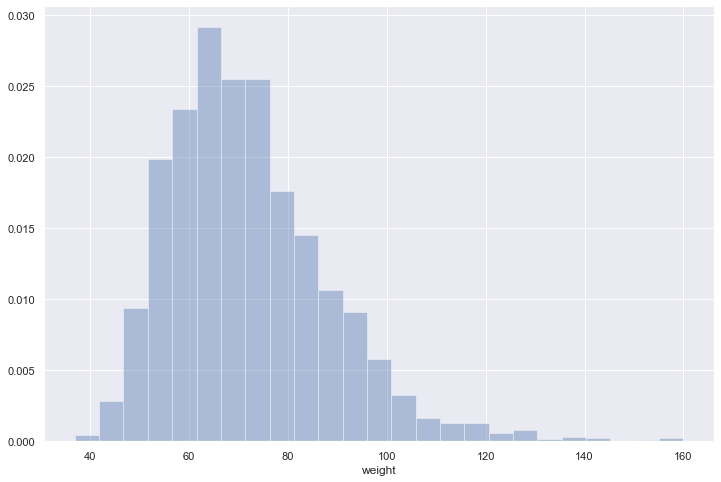

In [193]:
#Historgrama da amostra da coluna 'weight'
sns.distplot(weight_sample, kde=False, bins=25, hist_kws={"density": True});

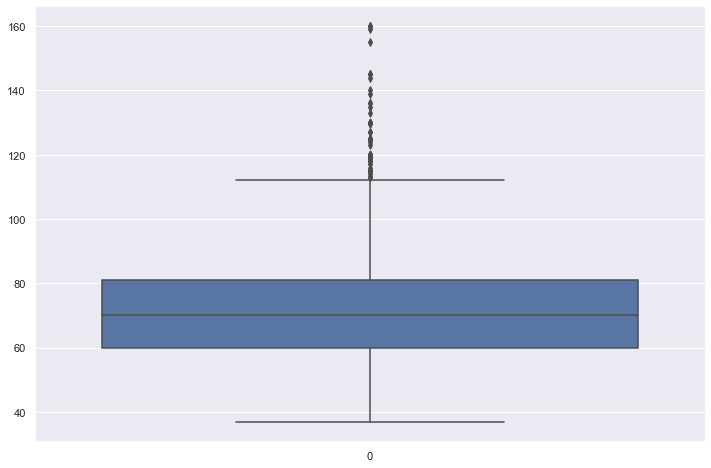

In [194]:
#Plotando box plot
sns.boxplot(data=weight_sample)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que? 

Resposta: Sim, o p valor está menor que a significancia e a distribuição não é normal(curva assimetrica)

* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [195]:
#Transformação Logaritmica
weight_sample_log=np.log(weight_sample)

In [196]:
#teste de normalidade D'Agostino-Pearson
dp_log=sct.normaltest(weight_sample_log)

In [197]:
def q4():
    return dp_log[1]>0.05

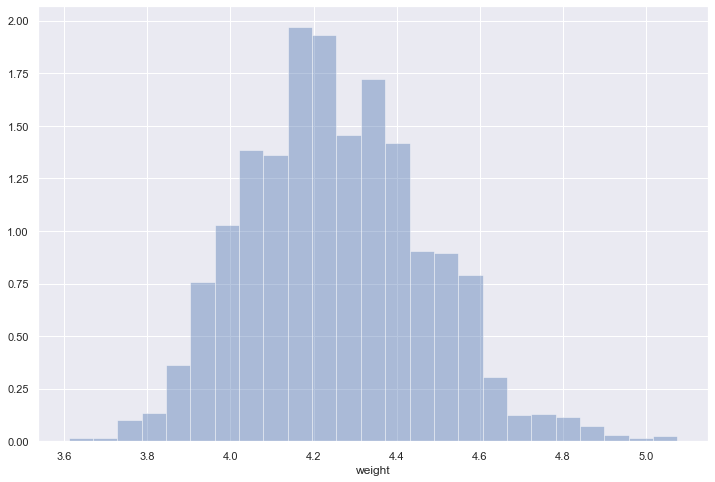

In [198]:
sns.distplot(weight_sample_log, kde=False, bins=25, hist_kws={"density": True});

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que? 

Resposta: Não, pois a forma do gráfico está parecendo uma normal e o p valor está menor que a significância.

* Você esperava um resultado diferente agora?

Resposta: Sim, espera que o p valor aumentasse mais (embora tenha aumentado significativamente)

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [199]:
#teste T
tt_br_us=sct.ttest_ind(bra['height'], usa['height'],equal_var=False,nan_policy='omit')
tt_br_us

Ttest_indResult(statistic=-3.2232436467501855, pvalue=0.0013080041830140115)

In [200]:
def q5():
    return tt_br_us[1]>0.05

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [201]:
tt_br_ca=sct.ttest_ind(can['height'], bra['height'], equal_var=False, nan_policy='omit')
tt_br_ca

Ttest_indResult(statistic=-0.6389304914365109, pvalue=0.5230827295440921)

In [202]:
def q6():
    return tt_br_ca[1]>0.05

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [203]:
x=sct.ttest_ind(usa['height'], can['height'], equal_var=False, nan_policy='omit')
x

Ttest_indResult(statistic=3.516987632488539, pvalue=0.0004660129347389851)

In [204]:
def q7():
    return round(x[1],8)

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

In [205]:
q1()

False

In [206]:
q2()

False

In [207]:
q3()

False

In [208]:
q4()

False

In [209]:
q5()

False

In [210]:
q6()

True

In [211]:
q7()

0.00046601